## Get tables of genes by weighted target site count, and length
---

In [6]:
library(naturalsort)
library(data.table)
library(EnsDb.Hsapiens.v86)
library(org.Hs.eg.db)

flst <- naturalsort(list.files('~/jackgl/analyses/gene_all_counts/')) # File names are same for each directory (lung, colon, brain)

In [28]:
#--- Make a table containing the weighted L1 snap-velcro target site count for each Ensembl v86 human gene
chroms <- c(1:22,'X','Y')
for (i in 1:24) {
    load(paste0('~/jackgl/analyses/gene_all_counts/',flst[i+1]))
    rownames(counts) <- gnames
    counts[,1] <- counts[,1]*7.46
    counts[,2] <- counts[,2]*3.48
    counts[,3] <- counts[,3]*2.05
    counts[,4] <- counts[,4]*1.00
    counts <- round(rowSums(counts))
    if (i==1) {
        out <- data.table(chrom=rep(chroms[i],length(counts)),geneSym=as.vector(gnames),tar=counts)
    } else {
        tmp <- data.table(chrom=rep(chroms[i],length(counts)),geneSym=as.vector(gnames),tar=counts)
        out <- rbind(out,tmp)
    }
}
out$tar <- out$tar/sum(out$tar)
gene_pdt <- out

### All genes ordered by weighted insertion site count

In [29]:
gene_pdt <- gene_pdt[!duplicated(gene_pdt$geneSym),] # Remove duplicate genes, by symbol
nrow(gene_pdt)
gene_pdt <- gene_pdt[order(-gene_pdt$geneSym),] # Order the table by gene symbol
gene_pdt[1:10]

[1] 56234

chrom,geneSym,tar
6,yR211F11.2,2.936999e-07
1,uc_338,1.376718e-07
11,snosnR66,1.422609e-07
5,snoZ6,3.059374e-09
3,snoZ40,3.977186e-08
15,snoZ278,1.835624e-08
2,snoZ196,5.659842e-08
14,snoU83B,6.730623e-08
4,snoU2_19,3.365312e-08
11,snoU2-30,3.059374e-08


### All genes ordered by length

In [30]:
tmp <- genes(EnsDb.Hsapiens.v86)
tmp <- data.table(chrom=as.vector(seqnames(tmp)),start=start(tmp),end=end(tmp),geneSym=tmp$gene_name)
tmp$len <- tmp$end-tmp$start
tmp <- tmp[tmp$chrom %in% c(1:22,'X','Y'),]
tmp <- tmp[!duplicated(tmp$geneSym),]
tmp <- tmp[order(-tmp$geneSym),]
nrow(tmp)
tmp[1:10]

[1] 56234

chrom,start,end,geneSym,len
6,158921271,158922150,yR211F11.2,879
1,29171285,29171453,uc_338,168
11,112602354,112602452,snosnR66,98
19,44725984,44726058,snoZ6,74
3,86125216,86125287,snoZ40,71
15,29233868,29233979,snoZ278,111
2,206161841,206161929,snoZ196,88
14,50844625,50844712,snoU83B,87
11,93721542,93721621,snoU2_19,79
11,93721797,93721866,snoU2-30,69


In [31]:
#--- This shows that tmp and gene_pdt have the same set of genes, in order
nrow(tmp)
nrow(gene_pdt)
length(which(tmp$geneSym %in% gene_pdt$geneSym))

[1] 56234

[1] 56234

[1] 56234

In [32]:
gene_pdt$len <- tmp$len # Assign length of each gene in gene_pdt
gene_pdt <- gene_pdt[order(-gene_pdt$tar),] # Order by target size
rm(tmp)

### Tumor suppressor genes (Cancer Gene Census) ordered by weighted insertion site count

In [33]:
tsgs <- read.table('~/jackgl/sim-develop/data/human_tsgs_cgc.txt')
tsgs <- tsgs$V1
tsgs <- tsgs[2:length(tsgs)]

cat('Tumor Suppressor Genes in Cancer Gene Census')
length(tsgs)
cat('Found in Ensembl v86 gene annotation:')
length(which(gene_pdt$geneSym %in% tsgs))
cat(paste(length(which(gene_pdt$geneSym %in% tsgs))/length(tsgs)*100,'%'))

gene_pdt_tsgs <- gene_pdt[gene_pdt$geneSym %in% tsgs]
gene_pdt_tsgs <- gene_pdt_tsgs[order(-gene_pdt_tsgs$tar),]
gene_pdt_tsgs[1:10]

Tumor Suppressor Genes in Cancer Gene Census

[1] 314

Found in Ensembl v86 gene annotation:

[1] 312

99.3630573248408 %

chrom,geneSym,tar,len
9,PTPRD,0.0015571939,2298477
7,CNTNAP2,0.0014701822,2304996
2,LRP1B,0.0013241675,1900278
3,ROBO2,0.0011671084,1743269
13,GPC5,0.0009794739,1475075
3,FHIT,0.0008821568,1502149
8,CSMD3,0.0008755485,1214171
2,ERBB4,0.0008040372,1163124
8,NRG1,0.0007121244,1128573
21,RUNX1,0.0006391186,1216866


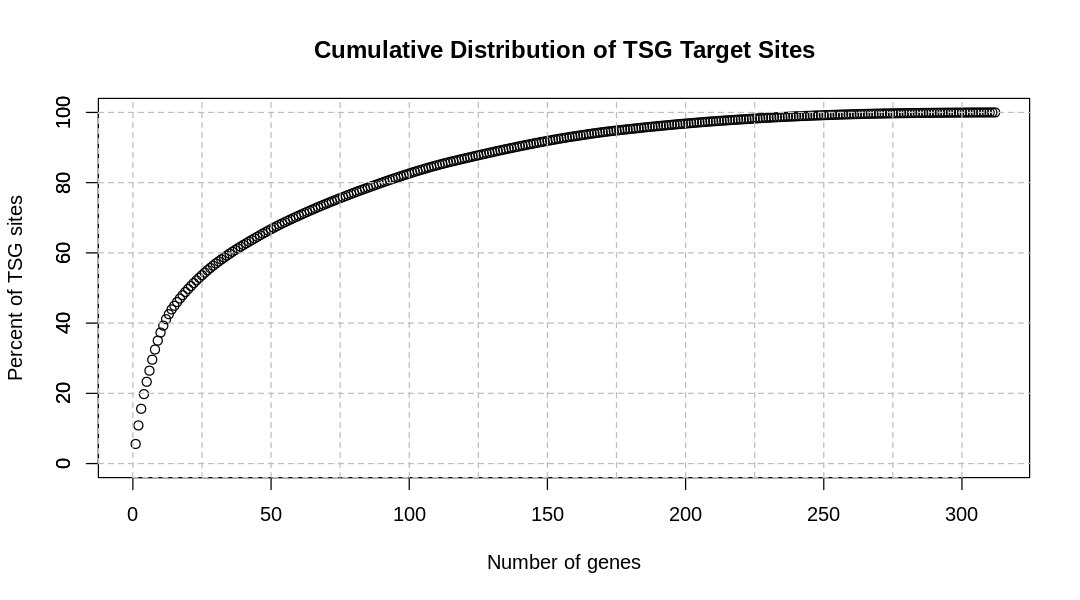

In [34]:
options(repr.plot.width=9, repr.plot.height=5)
plot(cumsum(gene_pdt_tsgs$tar[order(-gene_pdt_tsgs$tar)]*100/sum(gene_pdt_tsgs$tar)),
     ylab='Percent of TSG sites', xlab='Number of genes', main='Cumulative Distribution of TSG Target Sites',
     ylim=c(0,100), xlim=c(0,312))
axis(1,seq(0,312,25),tck=1,lty = 2, col = "grey",labels=NA)
axis(2,seq(0,100,20),tck=1,lty = 2, col = "grey",)

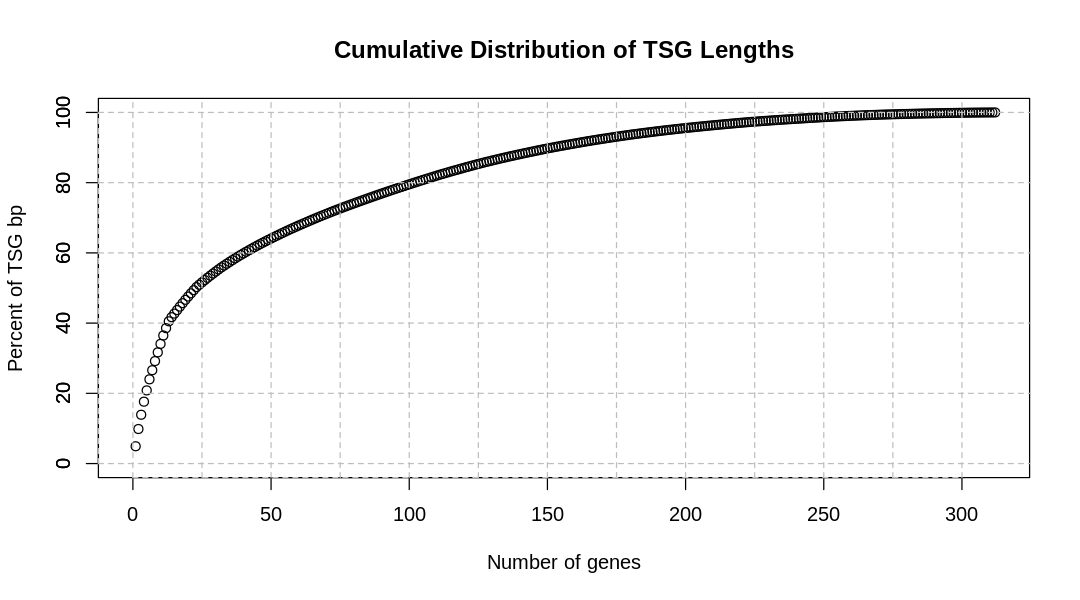

In [59]:
options(repr.plot.width=9, repr.plot.height=5)
plot(cumsum(gene_pdt_tsgs$len[order(-gene_pdt_tsgs$len)]*100/sum(gene_pdt_tsgs$len)),
     ylab='Percent of TSG bp', xlab='Number of genes', main='Cumulative Distribution of TSG Lengths',
     ylim=c(0,100), xlim=c(0,312))
axis(1,seq(0,312,25),tck=1,lty = 2, col = "grey",labels=NA)
axis(2,seq(0,100,20),tck=1,lty = 2, col = "grey",)

## Compare with Lee et al. (2012) gene lists
---

In [35]:
lee_genes <- read.table('~/jackgl/Lee_tableS2_genes.txt')
cat('Genes in Table S2')
length(lee_genes$V1)
tmp <- read.table('~/jackgl/Lee_fig2_genes.txt')
cat('Genes in Fig. 2C')
length(tmp$V1)
lee_genes <- rbind(lee_genes,tmp)
names(lee_genes) <- 'geneSym'
lee_genes <- unique(lee_genes$geneSym)
cat('Genes in union')
length(lee_genes)
lee_genes <- data.frame(geneSym=lee_genes)
head(lee_genes)

Genes in Table S2

[1] 65

Genes in Fig. 2C

[1] 44

Genes in union

[1] 71

geneSym
SPHKAP
ERBB4
KCNIP1
FPR2
COL11A1
GPR158


### All genes with insertions reported by Lee et al. (2012)

Number of genes from Tubio list found in gene annotation:

[1] 63

geneSym,tar,len,tarrank,lenrank,tarf,tarfrank
SPHKAP,1.251039e-04,201695,1696,1815,1.239800e-04,1713
ERBB4,8.040372e-04,1163124,36,51,7.892964e-04,38
KCNIP1,1.496982e-04,383145,1278,631,1.563585e-04,1181
FPR2,9.029743e-06,18500,16116,16254,9.171167e-06,16167
COL11A1,1.719537e-04,232029,1027,1461,1.678572e-04,1054
GPR158,2.788298e-04,427164,418,503,2.750619e-04,427


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"58 y values <= 0 omitted from logarithmic plot"

Correlation between log(counts) and log(length rank)

1.0000000,-0.7033383
-0.7033383,1.0000000


Correlation between log(counts) and log(target size rank)

1.0000000,-0.6511489
-0.6511489,1.0000000


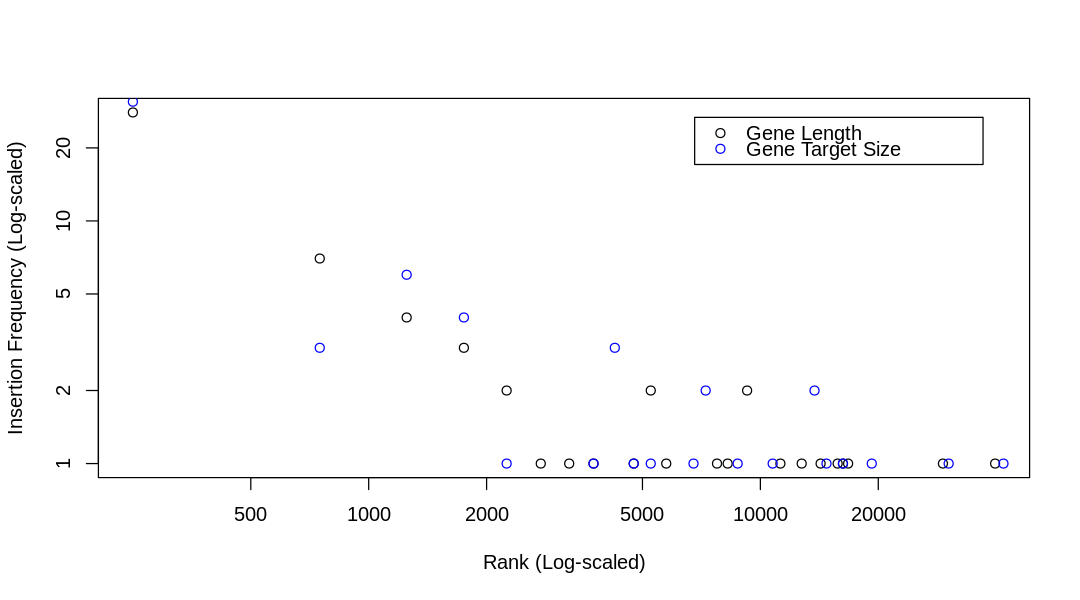

In [56]:
cat('Number of genes from Tubio list found in gene annotation:')
length(which(lee_genes$geneSym %in% gene_pdt$geneSym))

tmp <- lee_genes
tmp$tar <- NA
tmp$len <- NA
gene_pdt <- gene_pdt[order(-gene_pdt$tar),]
for (i in which(lee_genes$geneSym %in% gene_pdt$geneSym)) {
    tmp$tar[i] <- gene_pdt$tar[gene_pdt$geneSym==lee_genes$geneSym[i]]
    tmp$tarrank[i] <- which(gene_pdt$geneSym==lee_genes$geneSym[i])
}
gene_pdt <- gene_pdt[order(-gene_pdt$len),]
for (i in which(lee_genes$geneSym %in% gene_pdt$geneSym)) {
    tmp$len[i] <- gene_pdt$len[gene_pdt$geneSym==lee_genes$geneSym[i]]
    tmp$lenrank[i] <- which(gene_pdt$geneSym==lee_genes$geneSym[i])
}
gene_pdt$tarf <- (0.9*gene_pdt$tar)+(0.1*(gene_pdt$len/sum(gene_pdt$len)))
gene_pdt <- gene_pdt[order(-gene_pdt$tarf),]
for (i in which(lee_genes$geneSym %in% gene_pdt$geneSym)) {
    tmp$tarf[i] <- gene_pdt$tarf[gene_pdt$geneSym==lee_genes$geneSym[i]]
    tmp$tarfrank[i] <- which(gene_pdt$geneSym==lee_genes$geneSym[i])
}

tmp <- tmp[!is.na(tmp$tar),]
tmp <- tmp[!is.na(tmp$len),]

head(tmp)

# hist(tmp$tarrank,50,col='black',xlab='Gene Rank (by L1 target size)',ylab='Insertion Frequency',main='')
# hist(tmp$lenrank,50,col='black',xlab='Gene Rank (by length)',ylab='Insertion Frequency',main='')

tmp2 <- hist(tmp$lenrank,100,plot=FALSE)
tmp3 <- hist(tmp$tarfrank,100,plot=FALSE)
plot(tmp2$mids,tmp2$counts,xlab='Rank (Log-scaled)',ylab='Insertion Frequency (Log-scaled)',log='xy')
points(tmp3$mids,tmp3$counts,col='blue',)
legend('topright',legend=c("Gene Length","Gene Target Size"),pch=1,col=c('black','blue'),inset=0.05)

cat('Correlation between log(counts) and log(length rank)')
cor(cbind(log(tmp2$mids),log(tmp2$counts+0.01)),method='pearson')
cat('Correlation between log(counts) and log(target size rank)')
cor(cbind(log(tmp3$mids),log(tmp3$counts+0.01)),method='pearson')

### Cancer Gene Census TSGs with insertions reported by Lee et al. (2012)

In [38]:
length(which(gene_pdt_tsgs$geneSym %in% lee_genes$geneSym))
head(lee_genes[which(lee_genes$geneSym %in% gene_pdt_tsgs$geneSym),])
which(gene_pdt_tsgs$geneSym %in% lee_genes$geneSym)

[1] 4

[1] ERBB4    ROBO2    ARHGEF12 PTPRD   
71 Levels: 1-Dec ALS2CR8 ANKS1B ANO9 ARHGEF12 BBS7 CACNA2D3 CDH12 ... TMEM56

[1]  1  4  8 56

In [13]:
# lee_genes[which(!(lee_genes$geneSym %in% gene_pdt$geneSym)),]

## Compare with Tubio et al. (2014) gene lists
---

In [39]:
tubio_genes <- read.table('~/jackgl/Tubio_TableS3_genes.csv')
tubio_genes <- toString(tubio_genes$V1)
tubio_genes <- strsplit(tubio_genes,',')[[1]]
tubio_genes <- data.frame(geneSym=names(table(tubio_genes)),count=as.vector(table(tubio_genes)))
tubio_genes$geneSym <- trimws(as.character(tubio_genes$geneSym))
tubio_genes <- tubio_genes[order(-tubio_genes$count),]
length(tubio_genes$geneSym)
head(tubio_genes)

[1] 1022

,geneSym,count
293,CTNND2,9
230,CDH18,8
320,DLG2,8
360,EPHA6,8
322,DMD,6
62,AC067959.1,5


### All genes with insertions reported by Tubio et al. (2014)

Number of genes from Tubio list found in gene annotation:

[1] 843

,geneSym,count,tar,len,tarrank,lenrank,tarf,tarfrank
293,CTNND2,9,0.0005259034,932203,115,88,0.0005259396,110
230,CDH18,8,0.0007735061,1102922,44,64,0.0007584198,46
320,DLG2,8,0.0013705797,2172910,4,4,0.0013561911,4
360,EPHA6,8,0.0006311887,937879,66,87,0.0006210168,66
322,DMD,6,0.0014518138,2241764,3,3,0.0014331888,3
62,AC067959.1,5,0.0004352770,749784,172,152,0.0004340776,169


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"49 y values <= 0 omitted from logarithmic plot"

Correlation between log(counts) and log(length rank)

1.0000000,-0.7998553
-0.7998553,1.0000000


Correlation between log(counts) and log(target size rank)

1.0000000,-0.8036678
-0.8036678,1.0000000


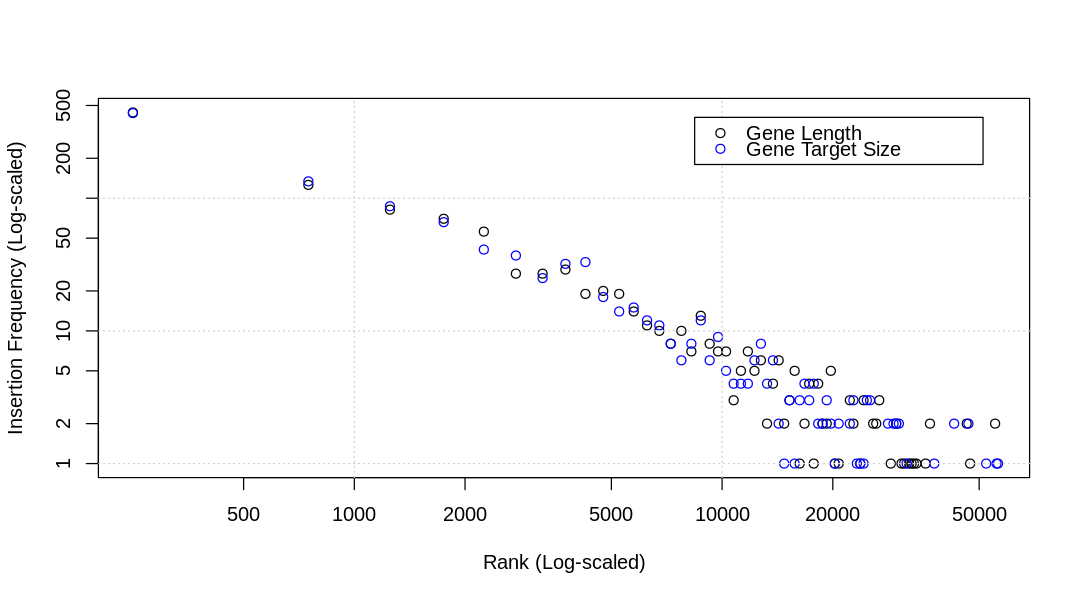

In [60]:
cat('Number of genes from Tubio list found in gene annotation:')
length(which(tubio_genes$geneSym %in% gene_pdt$geneSym))

tmp <- tubio_genes
tmp$tar <- NA
tmp$len <- NA
gene_pdt <- gene_pdt[order(-gene_pdt$tar),]
for (i in which(tubio_genes$geneSym %in% gene_pdt$geneSym)) {
    tmp$tar[i] <- gene_pdt$tar[gene_pdt$geneSym==tubio_genes$geneSym[i]]
    tmp$tarrank[i] <- which(gene_pdt$geneSym==tubio_genes$geneSym[i])
}
gene_pdt <- gene_pdt[order(-gene_pdt$len),]
for (i in which(tubio_genes$geneSym %in% gene_pdt$geneSym)) {
    tmp$len[i] <- gene_pdt$len[gene_pdt$geneSym==tubio_genes$geneSym[i]]
    tmp$lenrank[i] <- which(gene_pdt$geneSym==tubio_genes$geneSym[i])
}
gene_pdt$tarf <- (0.9*gene_pdt$tar)+(0.1*(gene_pdt$len/sum(gene_pdt$len)))
gene_pdt <- gene_pdt[order(-gene_pdt$tarf),]
for (i in which(tubio_genes$geneSym %in% gene_pdt$geneSym)) {
    tmp$tarf[i] <- gene_pdt$tarf[gene_pdt$geneSym==tubio_genes$geneSym[i]]
    tmp$tarfrank[i] <- which(gene_pdt$geneSym==tubio_genes$geneSym[i])
}

tmp <- tmp[!is.na(tmp$tar),]
tmp <- tmp[!is.na(tmp$len),]

head(tmp)

# hist(rep(tmp$tarrank,tmp$count),50,col='black',xlab='Gene Rank (by L1 target size)',ylab='Insertion Frequency',main='')
# hist(rep(tmp$lenrank,tmp$count),50,col='black',xlab='Gene Rank (by length)',ylab='Insertion Frequency',main='')

tmp2 <- hist(rep(tmp$lenrank,tmp$count),100,plot=FALSE)
tmp3 <- hist(rep(tmp$tarfrank,tmp$count),100,plot=FALSE)
plot(tmp2$mids,tmp2$counts,xlab='Rank (Log-scaled)',ylab='Insertion Frequency (Log-scaled)',log='xy')
points(tmp3$mids,tmp3$counts,col='blue',)
grid()
legend('topright',legend=c("Gene Length","Gene Target Size"),pch=1,col=c('black','blue'),inset=0.05)

cat('Correlation between log(counts) and log(length rank)')
cor(cbind(log(tmp2$mids),log(tmp2$counts+0.01)),method='pearson')
cat('Correlation between log(counts) and log(target size rank)')
cor(cbind(log(tmp3$mids),log(tmp3$counts+0.01)),method='pearson')

### Cancer Gene Census TSGs with insertions reported by Tubio et al. (2014)

[1] 21

,geneSym,count,tar,len,tarrank,lenrank,tarf,tarfrank
254,CNTNAP2,5,0.0014701822,2304996,2,1,0.006249191,2
666,PTPRD,4,0.0015571939,2298477,1,2,0.006313570,1
513,LRP1B,3,0.0013241675,1900278,3,3,0.005252852,3
271,CSMD3,2,0.0008755485,1214171,7,8,0.003382809,7
361,ERBB4,2,0.0008040372,1163124,8,9,0.003209356,8
424,GPC5,2,0.0009794739,1475075,5,6,0.004033922,5


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"102 y values <= 0 omitted from logarithmic plot"

Correlation between log(counts) and log(length rank)

1.0000000,-0.7033902
-0.7033902,1.0000000


Correlation between log(counts) and log(target size rank)

1.0000000,-0.6994801
-0.6994801,1.0000000


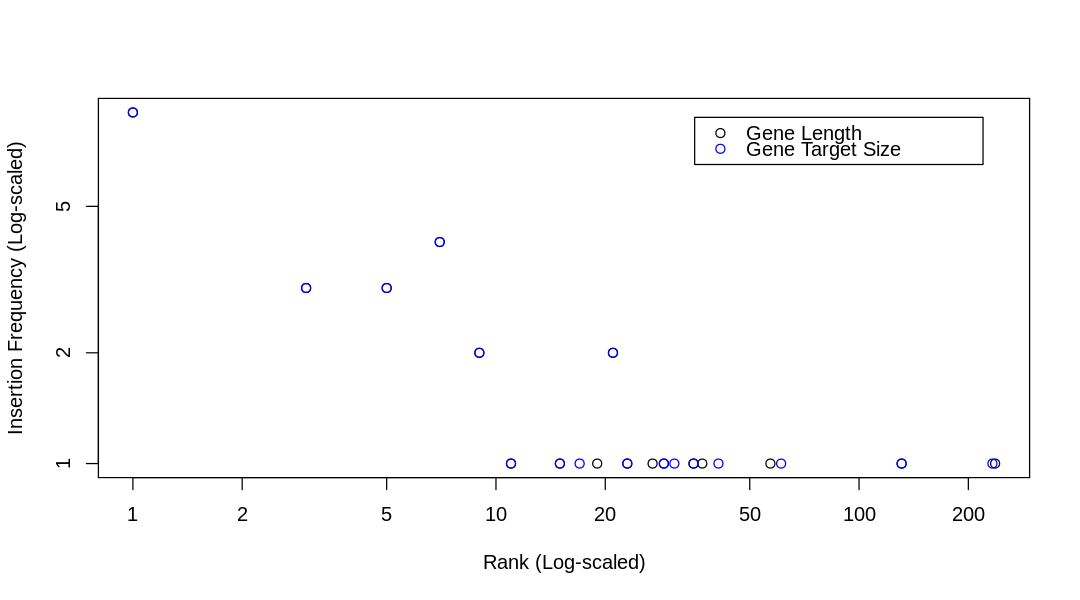

In [57]:
length(which(tubio_genes$geneSym %in% gene_pdt_tsgs$geneSym))

tmp <- tubio_genes
tmp$tar <- NA
tmp$len <- NA
gene_pdt_tsgs <- gene_pdt_tsgs[order(-gene_pdt_tsgs$tar),]
for (i in which(tubio_genes$geneSym %in% gene_pdt_tsgs$geneSym)) {
    tmp$tar[i] <- gene_pdt_tsgs$tar[gene_pdt_tsgs$geneSym==tubio_genes$geneSym[i]]
    tmp$tarrank[i] <- which(gene_pdt_tsgs$geneSym==tubio_genes$geneSym[i])
}
gene_pdt_tsgs <- gene_pdt_tsgs[order(-gene_pdt_tsgs$len),]
for (i in which(tubio_genes$geneSym %in% gene_pdt_tsgs$geneSym)) {
    tmp$len[i] <- gene_pdt_tsgs$len[gene_pdt_tsgs$geneSym==tubio_genes$geneSym[i]]
    tmp$lenrank[i] <- which(gene_pdt_tsgs$geneSym==tubio_genes$geneSym[i])
}
gene_pdt_tsgs$tarf <- (0.9*gene_pdt_tsgs$tar)+(0.1*(gene_pdt_tsgs$len/sum(gene_pdt_tsgs$len)))
gene_pdt_tsgs <- gene_pdt_tsgs[order(-gene_pdt_tsgs$tarf),]
for (i in which(tubio_genes$geneSym %in% gene_pdt_tsgs$geneSym)) {
    tmp$tarf[i] <- gene_pdt_tsgs$tarf[gene_pdt_tsgs$geneSym==tubio_genes$geneSym[i]]
    tmp$tarfrank[i] <- which(gene_pdt_tsgs$geneSym==tubio_genes$geneSym[i])
}

tmp <- tmp[!is.na(tmp$tar),]
tmp <- tmp[!is.na(tmp$len),]

head(tmp)

# hist(rep(tmp$tarrank,tmp$count),50,col='black',xlab='Gene Rank (by L1 target size)',ylab='Insertion Frequency',main='')
# hist(rep(tmp$lenrank,tmp$count),50,col='black',xlab='Gene Rank (by length)',ylab='Insertion Frequency',main='')

tmp2 <- hist(rep(tmp$lenrank,tmp$count),100,plot=FALSE)
tmp3 <- hist(rep(tmp$tarfrank,tmp$count),100,plot=FALSE)
plot(tmp2$mids,tmp2$counts,xlab='Rank (Log-scaled)',ylab='Insertion Frequency (Log-scaled)',log='xy')
points(tmp3$mids,tmp3$counts,col='blue',)
legend('topright',legend=c("Gene Length","Gene Target Size"),pch=1,col=c('black','blue'),inset=0.05)

cat('Correlation between log(counts) and log(length rank)')
cor(cbind(log(tmp2$mids),log(tmp2$counts+0.01)),method='pearson')
cat('Correlation between log(counts) and log(target size rank)')
cor(cbind(log(tmp3$mids),log(tmp3$counts+0.01)),method='pearson')